<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Непараметрические-критерии" data-toc-modified-id="Непараметрические-критерии-1">Непараметрические критерии</a></span><ul class="toc-item"><li><span><a href="#Одновыборочные-критерии" data-toc-modified-id="Одновыборочные-критерии-1.1">Одновыборочные критерии</a></span><ul class="toc-item"><li><span><a href="#Критерий-знаков" data-toc-modified-id="Критерий-знаков-1.1.1">Критерий знаков</a></span></li><li><span><a href="#Критерий-Уилкоксона-(ранговый)" data-toc-modified-id="Критерий-Уилкоксона-(ранговый)-1.1.2">Критерий Уилкоксона (ранговый)</a></span></li></ul></li><li><span><a href="#Двухвыборочные-(связные-выборки)" data-toc-modified-id="Двухвыборочные-(связные-выборки)-1.2">Двухвыборочные (связные выборки)</a></span><ul class="toc-item"><li><span><a href="#Критерий-знаков" data-toc-modified-id="Критерий-знаков-1.2.1">Критерий знаков</a></span></li><li><span><a href="#Критерий-Уилкоксона--(ранговый)" data-toc-modified-id="Критерий-Уилкоксона--(ранговый)-1.2.2">Критерий Уилкоксона  (ранговый)</a></span></li></ul></li><li><span><a href="#Двухвыборочные-(несвязанные-выборки)" data-toc-modified-id="Двухвыборочные-(несвязанные-выборки)-1.3">Двухвыборочные (несвязанные выборки)</a></span><ul class="toc-item"><li><span><a href="#Критерий-Манна-Уитни--(ранговый)" data-toc-modified-id="Критерий-Манна-Уитни--(ранговый)-1.3.1">Критерий Манна-Уитни  (ранговый)</a></span></li><li><span><a href="#Откуда-берется-табличное-распределение" data-toc-modified-id="Откуда-берется-табличное-распределение-1.3.2">Откуда берется табличное распределение</a></span></li></ul></li></ul></li><li><span><a href="#Критерии-согласия-и-однородности" data-toc-modified-id="Критерии-согласия-и-однородности-2">Критерии согласия и однородности</a></span><ul class="toc-item"><li><span><a href="#Критерий-Колмогорова" data-toc-modified-id="Критерий-Колмогорова-2.1">Критерий Колмогорова</a></span><ul class="toc-item"><li><span><a href="#Искусственные-примеры" data-toc-modified-id="Искусственные-примеры-2.1.1">Искусственные примеры</a></span></li></ul></li><li><span><a href="#Андерсон-Дарлинг-и-нормальность-распределения-акций" data-toc-modified-id="Андерсон-Дарлинг-и-нормальность-распределения-акций-2.2">Андерсон-Дарлинг и нормальность распределения акций</a></span></li><li><span><a href="#Однородность-выборок" data-toc-modified-id="Однородность-выборок-2.3">Однородность выборок</a></span></li><li><span><a href="#Критерий-Пирсона" data-toc-modified-id="Критерий-Пирсона-2.4">Критерий Пирсона</a></span><ul class="toc-item"><li><span><a href="#Число-пи,-дискретное-распределение" data-toc-modified-id="Число-пи,-дискретное-распределение-2.4.1">Число пи, дискретное распределение</a></span></li><li><span><a href="#Экспоненциальное-распределение-(непрерывное)" data-toc-modified-id="Экспоненциальное-распределение-(непрерывное)-2.4.2">Экспоненциальное распределение (непрерывное)</a></span></li><li><span><a href="#Снова-однородность" data-toc-modified-id="Снова-однородность-2.4.3">Снова однородность</a></span></li></ul></li></ul></li></ul></div>



# Непараметрические критерии

В этой тетрадке речь пойдёт про непараметрические критерии.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Будем исследовать данные про счастье :) 

In [2]:
df_2015 = pd.read_csv("2015.csv")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_2015.shape

(158, 12)

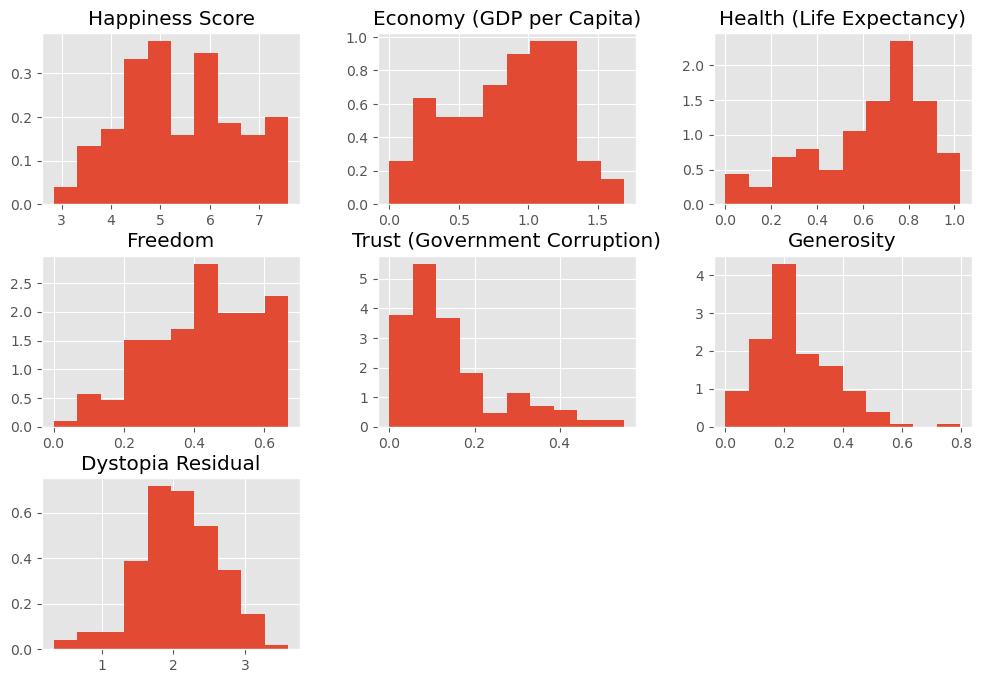

In [4]:
df_2015[['Happiness Score', 'Economy (GDP per Capita)',
         'Health (Life Expectancy)', 'Freedom',
         'Trust (Government Corruption)','Generosity', 
         'Dystopia Residual']].hist(density=True, figsize=(12,8));

## Одновыборочные критерии



In [7]:
df_2015['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

Как можно визуализировать распределения :

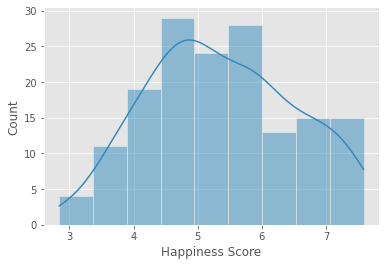

In [15]:
sns.histplot(data=df_2015, x='Happiness Score', bins=9, kde=True);

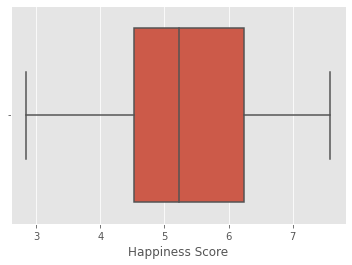

In [10]:
sns.boxplot(data=df_2015, x='Happiness Score');

### Критерий знаков

Проверим гипотезу о том, что медиана уровнея счастья равна $5$. 

$H_0\colon Med(X) = 5$

$H_1\colon Med(X) \ne 5$

In [6]:
stats.shapiro(df_2015['Happiness Score'].values)

ShapiroResult(statistic=0.9794797897338867, pvalue=0.018773794174194336)

In [29]:
from statsmodels.stats.descriptivestats import sign_test

x = df_2015['Happiness Score'].values
n = x.shape[0]
med_0 = 5

T, pvalue = sign_test(x, mu0=med_0)
T, pvalue


# The signs test returns
# M = (N(+) - N(-))/2
# pvalue < 0.05 => гипотеза отвергается на уровне значимости 5%

(14.0, 0.03138663605336963)

In [44]:
# наблюдаемая статистика
T = np.sum(x>med_0)
T

93

In [38]:
# M = (N(+) - N(-))/2
(T - (n - T))/2

14.0

In [39]:
from scipy import stats

In [51]:
# p-value
1-stats.binom.cdf(T, p=0.5, n=n)

0.010376869583876847

Гипотеза отвергается. 

In [11]:
x = df_2015['Happiness Score'].values
med_0 = 5

### Критерий Уилкоксона (ранговый)

In [12]:
stats.wilcoxon(x - med_0)

WilcoxonResult(statistic=4232.0, pvalue=0.0003762684243784701)

Гипотеза отвергается. 

## Двухвыборочные (связные выборки) 


Правда ли, что к 2019 году уровень счастья в мире вырос?

In [54]:
df_2015 = pd.read_csv("2015.csv")
df_2015 = df_2015[['Country','Happiness Score']]
df_2015.columns = ['Country', 'Happiness_2015']
df_2015.set_index('Country', inplace=True)

df_2019 = pd.read_csv("019.csv")
df_2019 = df_2019[['Country or region','Score']]
df_2019.columns = ['Country', 'Happiness_2019']
df_2019.set_index('Country', inplace=True)

df = df_2019.join(df_2015).dropna()
df.head()

,Happiness_2019,Happiness_2015
Country,,
Finland,7.769,7.406
Denmark,7.600,7.527
Norway,7.554,7.522
Iceland,7.494,7.561
Netherlands,7.488,7.378


In [55]:
df.describe()

,Happiness_2019,Happiness_2015
count,149.000000,149.000000
mean,5.433872,5.378289
std,1.111243,1.157782
min,3.083000,2.839000
25%,4.548000,4.518000
50%,5.425000,5.253000
75%,6.198000,6.295000
max,7.769000,7.587000


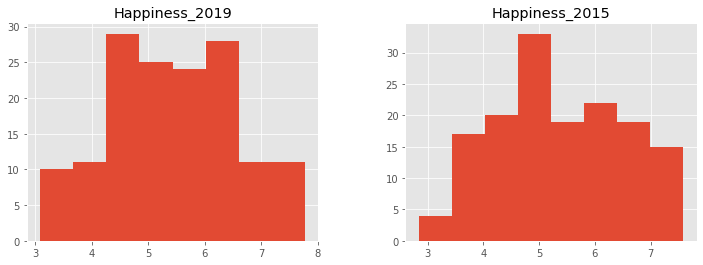

In [56]:
df.hist(figsize=(12,4), bins=8);

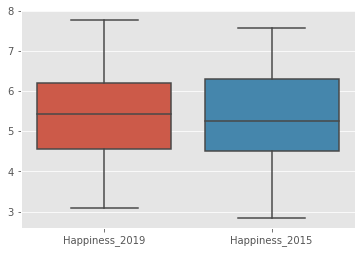

In [57]:
sns.boxplot(data=df);

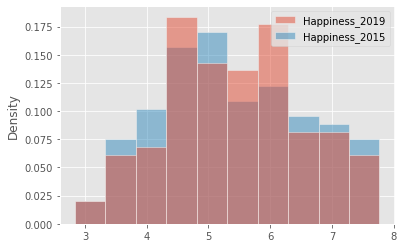

In [59]:
sns.histplot(data=df, stat='density');

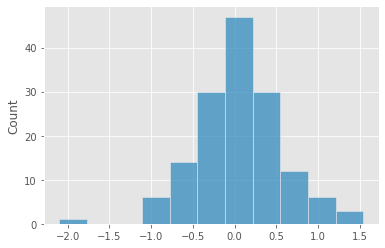

In [60]:
sns.histplot(df.Happiness_2019 - df.Happiness_2015, bins=11);

### Критерий знаков

$H_0\colon P(X > Y) = 0.5$, эквивалентно  $med(X) = med(Y) $

$H_1\colon P(X > Y) \ne 0.5$

In [62]:
x = df.Happiness_2019
y = df.Happiness_2015
_, pvalue = sign_test(x, y)
print(pvalue)



0.7432690217670563


Гипотеза об о том, что уровень счастья не изменился, не отвергается. 

### Критерий Уилкоксона  (ранговый)

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [63]:
stats.wilcoxon(x, y)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

In [64]:
# поменял местами года, и pvalue то же самое
stats.wilcoxon(y, x)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

Гипотеза об о том, что уровень счастья не изменился, не отвергается. 

## Двухвыборочные (несвязанные выборки) 

Правда ли, что в Европе уровень счастья выше, чем в Азии? 


In [13]:
df_2015 = pd.read_csv("2015.csv")
df_2019 = pd.read_csv("2019.csv")

In [14]:
df_2015.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [15]:
usl = df_2015.Region.apply(lambda w: 'Asia' in w)
x_asia = df_2015[usl]['Happiness Score']
x_asia.size

22

In [16]:
usl = df_2015.Region.apply(lambda w: 'Europe' in w)
x_eur = df_2015[usl]['Happiness Score']
x_eur.size

50

In [25]:
stats.shapiro(x_asia.values)

ShapiroResult(statistic=0.9884992837905884, pvalue=0.9938008189201355)

In [26]:
stats.shapiro(x_eur.values)

ShapiroResult(statistic=0.9497613906860352, pvalue=0.033353716135025024)

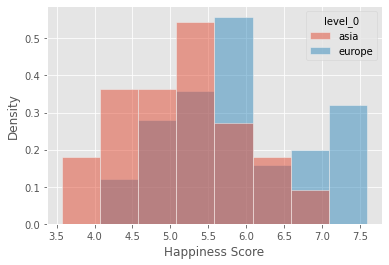

In [70]:
sns.histplot(data=pd.concat([x_asia, x_eur], axis=0, keys=['asia','europe']).reset_index(),
             x='Happiness Score', hue='level_0', 
             stat='density', common_norm=False
            );

# видно сдвиг размером в 1 бин

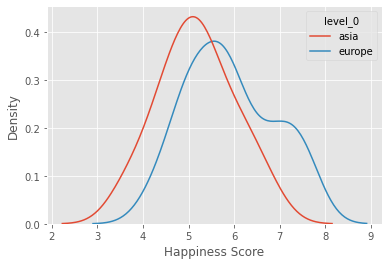

In [71]:
sns.kdeplot(data=pd.concat([x_asia, x_eur], axis=0, keys=['asia','europe']).reset_index(),
             x='Happiness Score', hue='level_0', 
              common_norm=False
            );
# также наблюдается сдвиг, форма распределения одинаковая

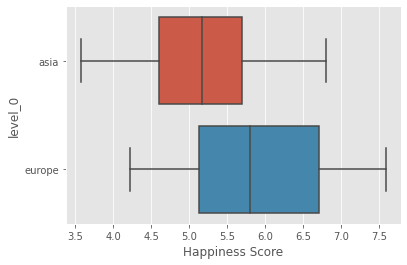

In [72]:
sns.boxplot(data=pd.concat([x_asia, x_eur], axis=0, keys=['asia','europe']).reset_index(),
             x='Happiness Score', y='level_0', 
            );
# синий бокс сдвинут

### Критерий Манна-Уитни  (ранговый)

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [73]:
stats.mannwhitneyu(x_eur, x_asia, alternative='greater')

MannwhitneyuResult(statistic=774.0, pvalue=0.0031457735731103722)

In [74]:
# а какие результаты у параметрического критерия?
stats.ttest_ind(x_eur, x_asia)

Ttest_indResult(statistic=3.112555403882886, pvalue=0.002685378854280552)

Гипотеза отвергается. По этим данным, в Европе люди счастливее.

### Откуда берется табличное распределение

In [107]:
from collections import Counter
import itertools

x_and_y = [1,2,3,4,5]
n_x = 2
n_y = 3

perm = list(itertools.permutations(x_and_y))

In [106]:
counts = np.array(list(Counter([sum(r[:n_x]) for r in perm]).items()))
counts = counts.astype(float)
counts[:,1] = counts[:,1] / counts.sum(axis=0)[1]
counts 

array([[3. , 0.1],
       [4. , 0.1],
       [5. , 0.2],
       [6. , 0.2],
       [7. , 0.2],
       [8. , 0.1],
       [9. , 0.1]])

#  Критерии согласия и однородности

## Критерий Колмогорова


__Гипотеза о неизвестном законе распределения:__ 

$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
K_n = \sqrt{n} \cdot \sup_{x} \mid \hat F_n(x) - F(x) \mid 
$$

При справедливости нулевой гипотезы распределение статистики $K_n$ одинаково для любого исходного непрерывного распределения.

### Искусственные примеры

Попробуем провести тест Колмогорова на нескольких искуственных примерах. 

In [27]:
# выборка с мат. ожиданием 5 и ст. отклоением 3
x = stats.norm(loc=5, scale=3).rvs(30, random_state=1)

# наши оценки мат. ожиданияи и ст. отклонения
mu, sigma = x.mean(), x.std(ddof=1)

mu, sigma

(4.82018326803313, 3.0790954528417696)

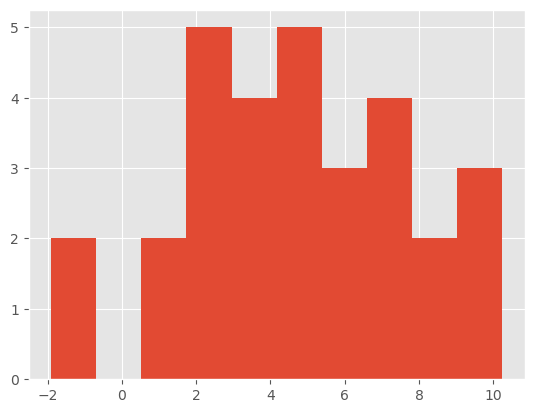

In [29]:
plt.hist(x);

In [30]:
stats.kstest(x, 'norm', args=(4.8, 3.1))
# pvalue > 0.05 
# => гипотеза о принадлежности к норм. распределнию с параметрами 4.8 и 3.1 не отвергается

KstestResult(statistic=0.09184364093739765, pvalue=0.941840733583611, statistic_location=1.6981424683612363, statistic_sign=-1)

In [59]:
stats.kstest(x, stats.norm(4.8, 3.1).cdf)

KstestResult(statistic=0.767742927990151, pvalue=2.82094422286647e-62, statistic_location=2.324295941355257, statistic_sign=1)

**Пример как в жизни:**
Пусть у нас есть большой массив исторических данных (Y) и мы хотим проверить, что вновь пришедшая выборка x имеет то же распределние.

In [33]:
Y = stats.norm(loc=mu, scale=sigma).rvs(100000) 

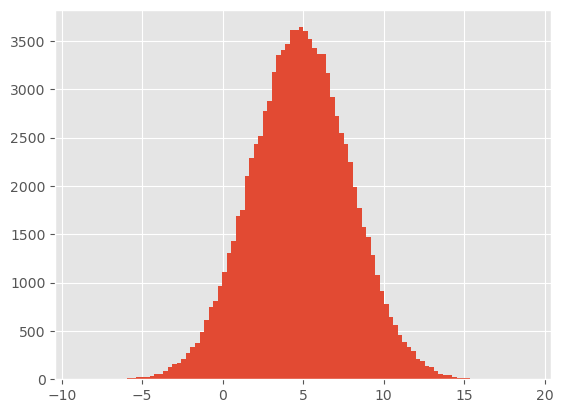

In [35]:
plt.hist(Y, bins=100);

In [36]:
from statsmodels.distributions.empirical_distribution import ECDF

Чтобы сравнивать распределения, нужно построить по историческим данным какую-то оценку функции распределения. Это за нас и делает ECDF - эмпирическая функция распределения.

In [38]:
Y_dist = ECDF(Y)

In [40]:
stats.kstest(x, Y_dist)

KstestResult(statistic=0.09328666666666663, pvalue=0.9347828174397542, statistic_location=4.631329323444056, statistic_sign=1)

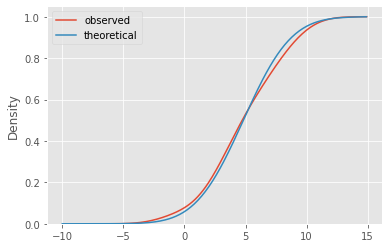

In [116]:
sns.kdeplot(x, cumulative=True, label='observed');

xs = np.arange(-10, 15, 0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

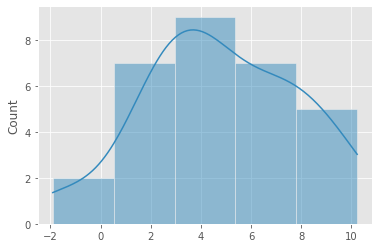

In [120]:
sns.histplot(x, kde=True, bins=5);

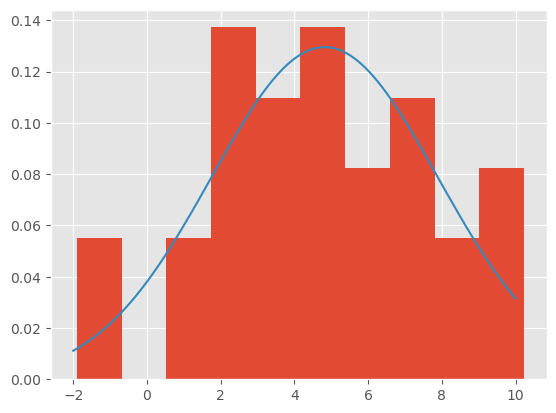

In [19]:
plt.hist(x, density=True);
l = np.linspace(-2, 10, 1000)
y = stats.norm(loc=mu, scale=sigma).pdf(l)
plt.plot(l, y);

Гипотеза о нормальности для выборки, сгенерированной из нормального распределения не отвергается. Сгенерируем выборку из равномерного распределения, а после протестируем гипотезу о нормальности.  

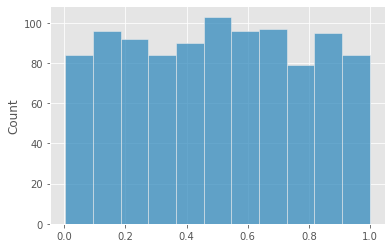

In [124]:
x = stats.uniform(0,1).rvs(1000)
sns.histplot(x, kde=False);

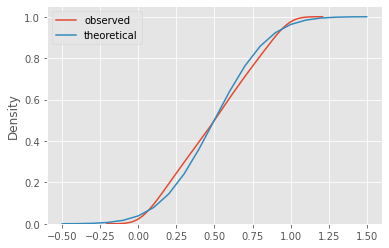

In [125]:
sns.kdeplot(x, cumulative=True)

mu, sigma = x.mean(), x.std(ddof=1)
xs = np.arange(-0.5,1.6,0.1)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf)

plt.legend(['observed', 'theoretical']);

In [127]:
stats.kstest(x, 'norm', args=(x.mean(), x.std(ddof=1)))

KstestResult(statistic=0.06273266183768433, pvalue=0.0007284142840850551)

Видим, что $p\_value$ очень низкое. Гипотеза о нормальности отвергается. По аналогии можно протестировать гипотезу для любого распределения. Вот пример с экспоненциальным распределением: 

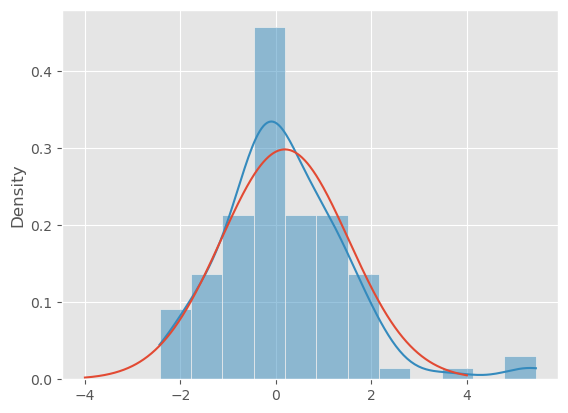

In [24]:
x = stats.t(5).rvs(100)
mu, sigma = x.mean(), x.std(ddof=1)
sns.histplot(x, kde=True, stat='density');
l = np.linspace(-4, 4, 1000)
y = stats.norm(loc=mu, scale=sigma).pdf(l)
plt.plot(l, y);

In [26]:
stats.kstest(x, stats.norm(loc=mu, scale=sigma).cdf)

KstestResult(statistic=0.09622965798711841, pvalue=0.2934933714171023)

Видим, что критерий ошибся.

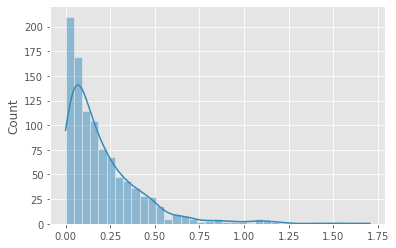

In [128]:
x = stats.expon(scale=0.2).rvs(1000)
sns.histplot(x, kde=True);

In [129]:
stats.kstest(x, 'expon', args=(0, x.mean()))

KstestResult(statistic=0.026141062692951744, pvalue=0.49326827287693054)

Первый аргумент отвечает за `loc` (экспоненциальное распределение со сдвигом). Он равен нулю.

## Андерсон-Дарлинг и нормальность распределения акций

Подгрузим данные о стоимости акций Яндекса в течение последних $10$ лет.

In [3]:
df = pd.read_csv('ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


Обычно финансисты работают с доходностями:

$$
R_t = \frac{P_t}{P_{t-1}}
$$

In [29]:
r = ((df.close.diff())/df.close.shift(1)).dropna()
r

fielddate
2011-05-25   -0.098867
2011-05-26   -0.006571
2011-05-27   -0.009203
2011-05-31   -0.029028
2011-06-01   -0.035874
                ...   
2020-06-24    0.026531
2020-06-25    0.004970
2020-06-26   -0.030069
2020-06-29    0.004283
2020-06-30    0.015841
Name: close, Length: 2290, dtype: float64

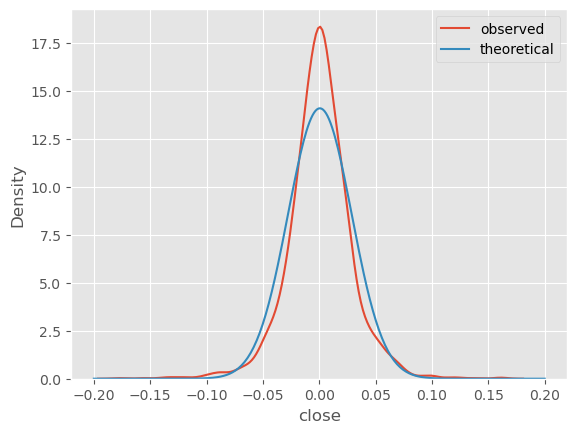

In [30]:
# r.hist(bins=50, density=True);
# sns.histplot(r, stat='density', bins=30, kde=True, label='observed')
sns.kdeplot(r, label='observed')

xs = np.linspace(-0.2, 0.2, 300)
pdf = stats.norm(loc=r.mean(), scale=r.std(ddof=1)).pdf(xs)
plt.plot(xs, pdf, label='theoretical')

plt.legend()
plt.show()

''

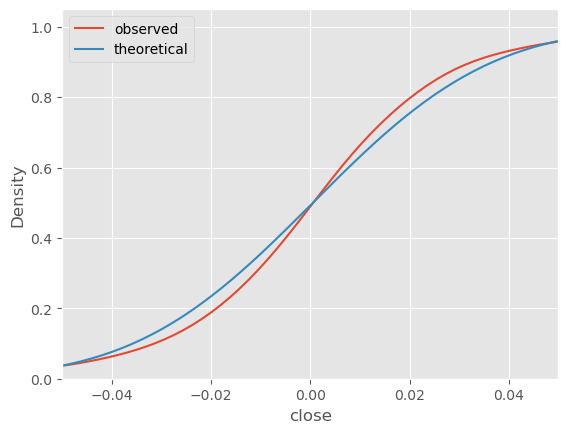

In [31]:
sns.kdeplot(r, cumulative=True)


mu, sigma = r.mean(), r.std(ddof=1)
xs = np.arange(r.min(),r.max(),0.001)
cdf = stats.norm.cdf(xs, loc=mu, scale=sigma)
plt.plot(xs, cdf)

plt.legend(['observed', 'theoretical'])
plt.xlim(-.05,.05)
;

 Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт. Можно заметить, что у распределения довольно тяжёлые хвосты. Чтобы увидеть это построим диаграмму квантиль-квантиль. Она позволяет сравнить выборочное распределение с теоретическим. 

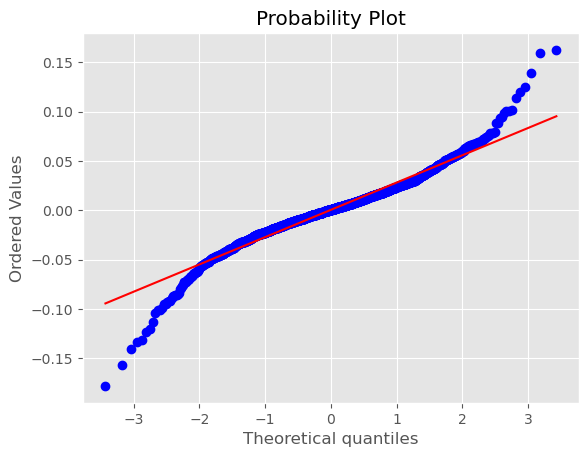

In [7]:
stats.probplot(r, dist="norm", plot=plt);

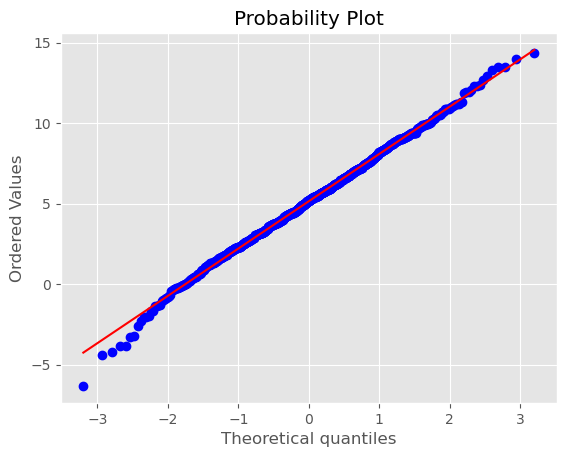

In [8]:
stats.probplot(stats.norm(loc=5, scale=3).rvs(1000), dist="norm", plot=plt);

На диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы наши наблюдения были из нормального распределения, они бы оказались на диагонали. Центр, действительно, укладывается на неё. А вот хвосты с неё спадают. Они оказываются тяжелыми.

Проверим гипотезу тестом Лиллиефорса. 

In [11]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors(r)

(0.05845783509742092, 0.0009999999999998899)

Гипотеза о нормальности отвергается, p_value оказалось очень маленьким. Обычно доходности моделируют с помощью распределений с тяжёлыми хвостами. Попробуем проверить ту же самую гипотезу, но с помощью критерия, специфицированного под хвосты [(Андерсона-Дарлинга)](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.normal_ad.html#statsmodels.stats.diagnostic.normal_ad): мы переносим на хвосты распределения дополнительный вес, чтобы критерий был к ним более чувствительным. 

In [160]:
from statsmodels.stats.diagnostic import normal_ad
normal_ad(r) 
# гипотеза о нормальности отвергается

(19.749165127467222, 0.0)

Попробуем этот же тест для выборки из нормального распределения.

In [166]:
x = stats.norm(loc=5, scale=3).rvs(10000)
normal_ad(x)
# гипотеза о нормальности не отвергается

(0.5379594519799866, 0.16799288849286972)

Используем также пройденные на лекции тесты Харке-Бера и Шапиро-Уилка

In [12]:
stats.jarque_bera(r)

Jarque_beraResult(statistic=1608.435640753106, pvalue=0.0)

In [13]:
stats.shapiro(r)

ShapiroResult(statistic=0.954282820224762, pvalue=3.4252380564039176e-26)

Видим, что оба теста отвергли нормальность выборки

### Синтетический пример

In [33]:
# x = stats.t(5).rvs(100)

lilliefors(x)

(0.09622965798711841, 0.02391641450386146)

In [34]:
stats.jarque_bera(x)

Jarque_beraResult(statistic=57.601658463318195, pvalue=3.1041835768519377e-13)

In [35]:
stats.shapiro(x)

ShapiroResult(statistic=0.932679295539856, pvalue=7.086042751325294e-05)

## Однородность выборок

__Ещё одно полезное свойство критерия:__ можно проверять гипотезу об однородности выборок, то есть пытаться понять из одного ли распределения они к нам пришли. Колмогоров доказал, что для этого случая распределение Колмогорова тоже подходит.

In [167]:
x = stats.norm(loc=5, scale=3).rvs(1000)
y = stats.norm(loc=5, scale=3).rvs(1000)
z = stats.expon(scale=0.2).rvs(1000)

In [168]:
stats.ks_2samp(x, y)
# гипотеза об однородности НЕ отвергается

KstestResult(statistic=0.028, pvalue=0.8282194040312439)

In [169]:
stats.ks_2samp(x, z)
# гипотеза об однородности отвергается

KstestResult(statistic=0.913, pvalue=0.0)

> __Важно:__  Критерий работает только для непрерывных распределений! Для дискретных ситуаций обычно используют критерий Пирсона. 

## Критерий Пирсона


__Гипотеза о неизвестном законе распределения:__ 


$$
\begin{aligned}
H_0 : X \sim F_0 \\
H_1 : X \nsim F_0
\end{aligned}
$$

__Статистика:__ 

$$
\sum_{j=1}^s \frac{\left(O_{i}-E_{i}\right)^{2}}{E_{i}} = \sum_{j=1}^s \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{s - k - 1},
$$

где 
- $\hat \theta$ - любая состоятельная оценка параметра, 
- $v_j$ - частота, с которой значение $j$ встречалось в выборке, 
- $p_j$ - теоретическая вероятность того, что выпадет значение $j$,  
- $s$ - число значений, которые может принимать случайная величина, 
- $k$ - размерность вектора параметров $\theta$, 


### Число пи, дискретное распределение

В десятичной записи числа $\pi$ среди первых $10002$ знаков после запятой цифры $0, 1, \dots, 9$ встречаются соответственно 968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014 раз. Можно ли при уровне значимости $0.05$ считать эти цифры случайными? При каком уровне значимости эта гипотеза отвергается?

У нас есть дискретное распределение и $10$ вероятностей. Нужно проверить гипотезу о равномерности этого распределения. Будем делать это с помощью критерия Пирсона. 

In [ ]:
stats.chisquare

In [45]:
import math

In [46]:
math.pi

3.141592653589793

In [47]:
n = 10002
observed_cnts = np.array([968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014])
p = observed_cnts/n
p

array([0.09678064, 0.10257948, 0.10207958, 0.09738052, 0.10137972,
       0.10457908, 0.10207958, 0.0969806 , 0.09478104, 0.10137972])

In [48]:
expected_prob = np.array([1/10]*10)
expected_prob

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Статистика для теста Пирсона выглядит как

$$
\sum_{j=1}^{10} \frac{(v_j - n \cdot p_j(\hat \theta))^2}{n \cdot p_j(\hat \theta)} \sim \chi^2_{9},
$$

In [49]:
T = np.sum((observed_cnts - n*expected_prob)**2 / (n*expected_prob))
T

9.367726454709057

Статистика Пирсона имеет $\chi^2_9$. Найдём для неё критическое значения на уровне значимости $5\%$.

In [50]:
chi2_crit = stats.chi2.ppf(0.95, df=9)
chi2_crit

16.918977604620448

In [51]:
T < chi2_crit
# не отвергаем гипотезу о равновероятности числе в числе пи

True

Наблюдаемое значение меньше критического. Гипотеза о равномерности не отвергается. Найдём $p\_value$.

In [52]:
1 - stats.chi2.cdf(T, df=9)

0.4040452075150309

Видим, что $p\_value$ на порядок выше $5\%$, значит гипотеза не отвергается. 

Ровно то же самое можно сделать встроенным тестом. 

In [53]:
observed_cnts

array([ 968, 1026, 1021,  974, 1014, 1046, 1021,  970,  948, 1014])

In [56]:
expected_prob*n

array([1000.2, 1000.2, 1000.2, 1000.2, 1000.2, 1000.2, 1000.2, 1000.2,
       1000.2, 1000.2])

In [57]:
n

10002

In [58]:
from scipy.stats import chisquare
chisquare(observed_cnts, f_exp=n*expected_prob)

Power_divergenceResult(statistic=9.367726454709057, pvalue=0.40404520751503087)

> По аналогии с тестом Колмогорова, тест Пирсона можно использовать, чтобы проверять выборки на однородность. В таком случае критерий хочет получить на вход таблицу сопряжённости для двух распределений. 

### Экспоненциальное распределение (непрерывное)

Для удобного разбиения на бины можно использовать функцию `pd.cut` https://pandas.pydata.org/docs/reference/api/pandas.cut.html

Проверяем гипотезу, что выборка ниже из экспоненциального распределения

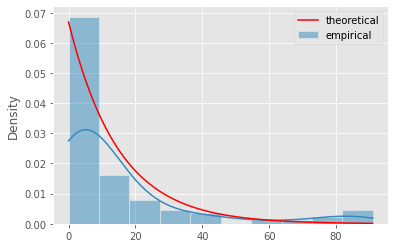

In [217]:
X = np.array([1,1,7,16,8,8,11,7,5,45,13,0,36,15,4,15,7,39,6,91,28,7,0,2, 
              9,2,6,1,4,83,2,3,5,34,1,1,2,0,11,79,2,2,4,1,3,0,2,2,17,55,8, 
              9,20,23,16,3,5,5,4,84,1,20,1,1,20,0,19,17,5,66,0,2,5,1,26, 
              14,1,0,9,88,4,11,4,2,1,32,21,2,15,76,44,8,16,12,1,9])
scale_mle = X.mean()
n = X.size

sns.histplot(X, stat='density', label='empirical', bins=10, kde=True);

xs = np.arange(X.min(),X.max(),0.1)
plt.plot(xs, stats.expon.pdf(xs, scale=scale_mle), 'red', label='theoretical');
plt.legend()
plt.show()

In [203]:
# для разбиения на интервалы выберем в качестве границ теор. квантиили
# Q = [0.2,0.4,0.6,0.8]
Q = np.arange(0.1,1,0.1)
qs_ = [stats.expon.ppf(q, scale=scale_mle) for q in Q]
qs = np.array([-np.inf]+qs_+[np.inf])
qs


array([       -inf,  1.5738227 ,  3.3332068 ,  5.32783198,  7.63045776,
       10.35388601, 13.68709281, 17.98434376, 24.04097882, 34.39486483,
               inf])

In [204]:
Q

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [209]:
E_ = []
O_ = []

for i in range(len(qs)-1):
    a,b = qs[i], qs[i+1]
    prob = stats.expon.cdf(b, scale=scale_mle) - stats.expon.cdf(a, scale=scale_mle)
    E = n*prob # expected
    O = sum([a<x<=b for x in X]) # observed
    
    print(f'P({a:.3f} ≤ X < {b:.3f}) \t= {prob:.3f}, \t Expected={E:.1f}, \t Observed={O}')
    
    E_.append(E)
    O_.append(O)

E_ = np.array(E_)
O_ = np.array(O_)

assert O_.sum() == n

P(-inf ≤ X < 1.574) 	= 0.100, 	 Expected=9.6, 	 Observed=20
P(1.574 ≤ X < 3.333) 	= 0.100, 	 Expected=9.6, 	 Observed=14
P(3.333 ≤ X < 5.328) 	= 0.100, 	 Expected=9.6, 	 Observed=12
P(5.328 ≤ X < 7.630) 	= 0.100, 	 Expected=9.6, 	 Observed=6
P(7.630 ≤ X < 10.354) 	= 0.100, 	 Expected=9.6, 	 Observed=8
P(10.354 ≤ X < 13.687) 	= 0.100, 	 Expected=9.6, 	 Observed=5
P(13.687 ≤ X < 17.984) 	= 0.100, 	 Expected=9.6, 	 Observed=9
P(17.984 ≤ X < 24.041) 	= 0.100, 	 Expected=9.6, 	 Observed=6
P(24.041 ≤ X < 34.395) 	= 0.100, 	 Expected=9.6, 	 Observed=4
P(34.395 ≤ X < inf) 	= 0.100, 	 Expected=9.6, 	 Observed=12


In [215]:
# 10 - кол-во возможных бинов
# -1 потому что оценили параметр lambda для экспоненционального распределения
# -1 из формулы
s = len(O_)
df = s-1-1
alpha = 0.05

stat_obs = np.sum((O_-E_)**2/E)
pval = 1-stats.chi2.cdf(stat_obs, df=df)


print('stat_obs\t',stat_obs)
print('stat_crit\t',stats.chi2.ppf(1-alpha,df))
print('p-value \t',pval)

# гипотеза отвергается на уровне значимости 5%

stat_obs	 22.958333333333336
stat_crit	 15.50731305586545
p-value 	 0.0034181553602405934


In [ ]:
from scipy.stats import chisquare
# через scipy 
chisquare(O_, f_exp=E_, ddof=1)

### Снова однородность

Критерий Пирсона также можно применять для таблиц сопряженности размера больше чем 2 на 2.

В этой случае мы будем тестировать гипотезу о том, что 2 категориальных фактора не зависимы друг от друга, причем категорий у этих факторов может быть более двух.

__Статистика:__ 

$$
\sum_{j=1}^s \frac{\left(O_{i}-E_{i}\right)^{2}}{E_{i}} \sim \chi^2_{(k-1)(m-1)},
$$

где 
- $k$ - кол-во строк в таблице сопряженности, 
- $m$ - кол-во столбцов в таблице сопряженности

Рассмотрим пример. Мужчин и женщин опрашивают о их политических взглядах. Правда ли, что их распределение взглядов значимо различается?

In [218]:
df = pd.DataFrame([[762, 327, 468],[484, 239, 477]])
df.columns = ["Democrat","Independent", "Republican"]
df.index = ["F", "M"]
df

,Democrat,Independent,Republican
F,762,327,468
M,484,239,477


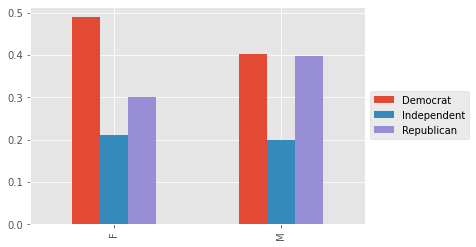

In [219]:
(df.T/df.sum(axis=1)).T.plot(kind='bar');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [220]:
n = df.sum().sum()
n

2757

In [221]:
df.sum()

Democrat       1246
Independent     566
Republican      945
dtype: int64

In [222]:
df.sum(axis=1)/n

F    0.564744
M    0.435256
dtype: float64

In [230]:
# посмотрим, что выдаст нам тест
from scipy.stats import chi2_contingency
chi, pvalue, df_, expected = chi2_contingency(df.values)

In [231]:
expected

array([[703.67138194, 319.64526659, 533.68335147],
       [542.32861806, 246.35473341, 411.31664853]])

In [232]:
# откуда ожидаемые частоты - выясним вручную
np.array(
[[1246 * 0.564744, 1246*0.435256],
  [566 * 0.564744, 566 *0.435256 ],
  [945 * 0.564744, 945 *0.435256 ],
 ]).T

array([[703.671024, 319.645104, 533.68308 ],
       [542.328976, 246.354896, 411.31692 ]])

In [233]:
# откуда ожидаемые частоты - матрично
(df.sum().values.reshape(3,1)  * (df.sum(axis=1)/n).values.reshape(1,2)).T

array([[703.67138194, 319.64526659, 533.68335147],
       [542.32861806, 246.35473341, 411.31664853]])

In [234]:
# (кол-во столбиков - 1) * (кол-во строк - 1)
# (3-1)*(2-1)
df_

2

In [236]:
pvalue

2.9535891832117595e-07

In [237]:
pvalue < 0.05

True

Гипотеза об неоднородности выборок отвергается. 